 <h1>An Analysis of the #FeesMustFall Movement through Twitter Data<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Research-Question/Objectives" data-toc-modified-id="Research-Question/Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research Question/Objectives</a></span><ul class="toc-item"><li><span><a href="#Research-Questions" data-toc-modified-id="Research-Questions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Research Questions</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Objectives</a></span></li></ul></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset</a></span><ul class="toc-item"><li><span><a href="#Scraping-the-data" data-toc-modified-id="Scraping-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Scraping the data</a></span><ul class="toc-item"><li><span><a href="#Core-data-(using-the-command-line)" data-toc-modified-id="Core-data-(using-the-command-line)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Core data (using the command line)</a></span></li><li><span><a href="#Benchmark/auxiliary-data-(using-the-Twitter-API)" data-toc-modified-id="Benchmark/auxiliary-data-(using-the-Twitter-API)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Benchmark/auxiliary data (using the Twitter API)</a></span></li></ul></li><li><span><a href="#Cleaning-the-data" data-toc-modified-id="Cleaning-the-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cleaning the data</a></span><ul class="toc-item"><li><span><a href="#Core-data" data-toc-modified-id="Core-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Core data</a></span></li><li><span><a href="#Benchmark-data" data-toc-modified-id="Benchmark-data-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Benchmark data</a></span></li><li><span><a href="#Network-data" data-toc-modified-id="Network-data-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Network data</a></span></li></ul></li></ul></li><li><span><a href="#Visualising-the-data" data-toc-modified-id="Visualising-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualising the data</a></span><ul class="toc-item"><li><span><a href="#Unfolding-of-events-(Objective-1---WHEN-YOU-FINISHED,-LABEL-OTHER-OBJECTIVES-IN-HEADINGS)" data-toc-modified-id="Unfolding-of-events-(Objective-1---WHEN-YOU-FINISHED,-LABEL-OTHER-OBJECTIVES-IN-HEADINGS)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Unfolding of events (Objective 1 - WHEN YOU FINISHED, LABEL OTHER OBJECTIVES IN HEADINGS)</a></span></li><li><span><a href="#Twitter-as-a-tool-to-mobilise-protestors" data-toc-modified-id="Twitter-as-a-tool-to-mobilise-protestors-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Twitter as a tool to mobilise protestors</a></span></li><li><span><a href="#Network-analysis" data-toc-modified-id="Network-analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Network analysis</a></span></li><li><span><a href="#Analysing-the-text" data-toc-modified-id="Analysing-the-text-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Analysing the text</a></span><ul class="toc-item"><li><span><a href="#Sentiment-analysis" data-toc-modified-id="Sentiment-analysis-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Sentiment analysis</a></span></li><li><span><a href="#Determining-recurring-topics-and-subjacent-issues" data-toc-modified-id="Determining-recurring-topics-and-subjacent-issues-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Determining recurring topics and subjacent issues</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Positive-externalities/side-achievements" data-toc-modified-id="Positive-externalities/side-achievements-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Positive externalities/side achievements</a></span></li></ul></li></ul></div>

In [1]:
# Import necessary modules
# Some of the these modules will require installation from the command line (e.g. dash)

import numpy as np
import pandas as pd
import glob
import datetime as dt
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import time
import random
import json
import tweepy
import pickle
import csv
import networkx as nx
from scipy import stats
from operator import itemgetter
from IPython.display import display, HTML
from IPython.display import Image
import dash
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from langdetect import detect 
from textblob import TextBlob 
import re
%matplotlib inline

# Allows side by side dataframe/images in the specified cell
CSS = """
div.cell:nth-child(7) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

## Introduction 

#FeesMustFall is a South African student-led protest movement born out of the excessively high tuition fees relative to average national income, making higher education inaccessible for most of the population. 

During my first year of university in Cape Town, I distinctly remember the sound of gunshots and stun grenades from outside the doors of our residence hall. These were the measures taken by the South African Police Force (SAPS) to control increasingly violent protests. Having been a part of this defining moment in South African education has __motivated__ me to analyse the protests from a statistical perspective.

The protests began in mid-October 2015 and focused on attaining two primary goals:
1. Abolish annual increases in tertiary tuition fees.
2. Increase government funding of universities.

Protests started at the University of Witwatersrand and spread to the University of Cape Town and Rhodes University. Within several weeks, protests were country-wide ultimately resulting in a national education crisis with an estimated total cost of $44,25 million, just in property damage. Images of protests at two universities during the crisis are shown below.

Having lived among the leaders of the #FeesMustFall movement in Leo Marquard Hall, I recall Twitter playing a major role in mobilising the youth, co-ordinating protests and providing a platform for debate surrounding the topic. This notebook delves deeper into the events of the 2015/2016 education crisis from a data perspective.


University of Cape Town    | Wits University
:-------------------------:|:-------------------------:
<img src="images/paint.jpg" width="490" height="400"/>  |  <img src="images/fees-must-fall-4.jpg" width="630" height="450"/>
<img src="images/http---com.ft.imagepublish.prod.s3.amazonaws.com-231fbbce-8caa-11e6-8cb7-e7ada1d123b1.jpg" width="670" height="480"/>|<img src="images/fees-must-faa-3.jpg" width="460" height="450"/>



## Research Question/Objectives

### Research Questions

1. Is there a correlation between Twitter activity and protest action?
2. Who are the central users and influential participants in the protests? Is there a high level of interaction between these users and can any clusters be identified?
3. What was the general sentiment surrounding the protests?
4. IF YOU GET TO THIS: Are there any subjacent events that can be traced back to the protests?


### Objectives

1. Provide insight into the volume of tweets with the #FeesMustFall tag over time. Gain a deeper understanding on how the movement gained traction over time by linking tweet volume to significant events. Delve deeper into the link between Twitter activity and protest action.
2. Examine the network of tweeters and clusters underlying the core data. Identify key participants, their links and their influence on the movement. Special focus will be given to high profile individuals tweeting on the movement.
3. Perform sentiment analysis on the tweets to determine public perception of the protests with the aid of machine learning.
4. Subjacent issues via hashtag analysis lead into next steps. POTENTIALLY CONSIDER CURRENT FEESMUSTFALL TWEETS AS A SUBJACENT ISSUE (I.E. FEESMUSTFALL IN INDIA) (or elsewhere) - using Twitter data as a metric for pre-empting similar movements using the SA example as a benchmark.

## Dataset

The data to be analysed in this notebook is drawn from two sources:

1. __Core data:__  consists of tweets that contain the tag #FeesMustFall taken from the period __21/03/2015 - 31/10/2016__ scraped from the command line.
2. __Benchmark data:__ consists of tweets (from __01/02/2017 onwards__) from users who posted at least once with the #FeesMustFall tag. Data was obtained using the Twitter API.
3. __Network data:__ consists of a list of nodes and edges as well as a dictionary of user follower counts. The data is primarily obtained by manipulating and shaping the core data. However, additional data in the form of user follower counts is scraped using the Twitter API.

The table below contains information on the core and benchmark data. Variables removed during the cleaning phase are not included.

| Dataset | Tweet count (before clean) | Tweet count (after clean) | Variable 1| Variable 2| Variable 3| Variable 4| Variable 5| Variable 6| Variable 7|
| ------------------- | ------------- | ----------------------- | ---|---|---|---|---|---|---|
| Core   | 447204 |352841       |  date	|username	|replies |retweets|	favorites|	text|	mentions|	hashtags|	permalink  
| Benchmark  | 112223    |    27342 |created_at	|text	|favorites	|retweets|	in_reply_to




The table and boxplot below highlight key descriptive statistics of the core data, obtained after the cleaning phase. Statistics are shown for replies, retweets and favourites (collectively referred to as types of engagment). The boxplot is not highly informative, however, it does highlight (HIGHLY SKEWED DATA AND THE POTENTIAL NEED TO ANALYSE THE OUTLIERS - AS THESE ARE THE ONES WITH THE MOST REACH - THEREFORE WE PERFORM SENTIMENT ANALYSIS) clear that while most of the data lies between 0 and 2, there are several outliers with extremely large engagement counts

Replies       Retweets     Favourites
Tweet Count           352841.000000  352841.000000  352841.000000
Average                    0.206495       2.803835       1.112705
Standard Deviation         1.314331      22.449769      19.909709
Min value                  0.000000       0.000000       0.000000
Lower Quartile (25%)       0.000000       0.000000       0.000000
Median (50%)               0.000000       0.000000       0.000000
Upper Quartile (75%)       0.000000       1.000000       1.000000
Max value                175.000000    3626.000000    8311.000000

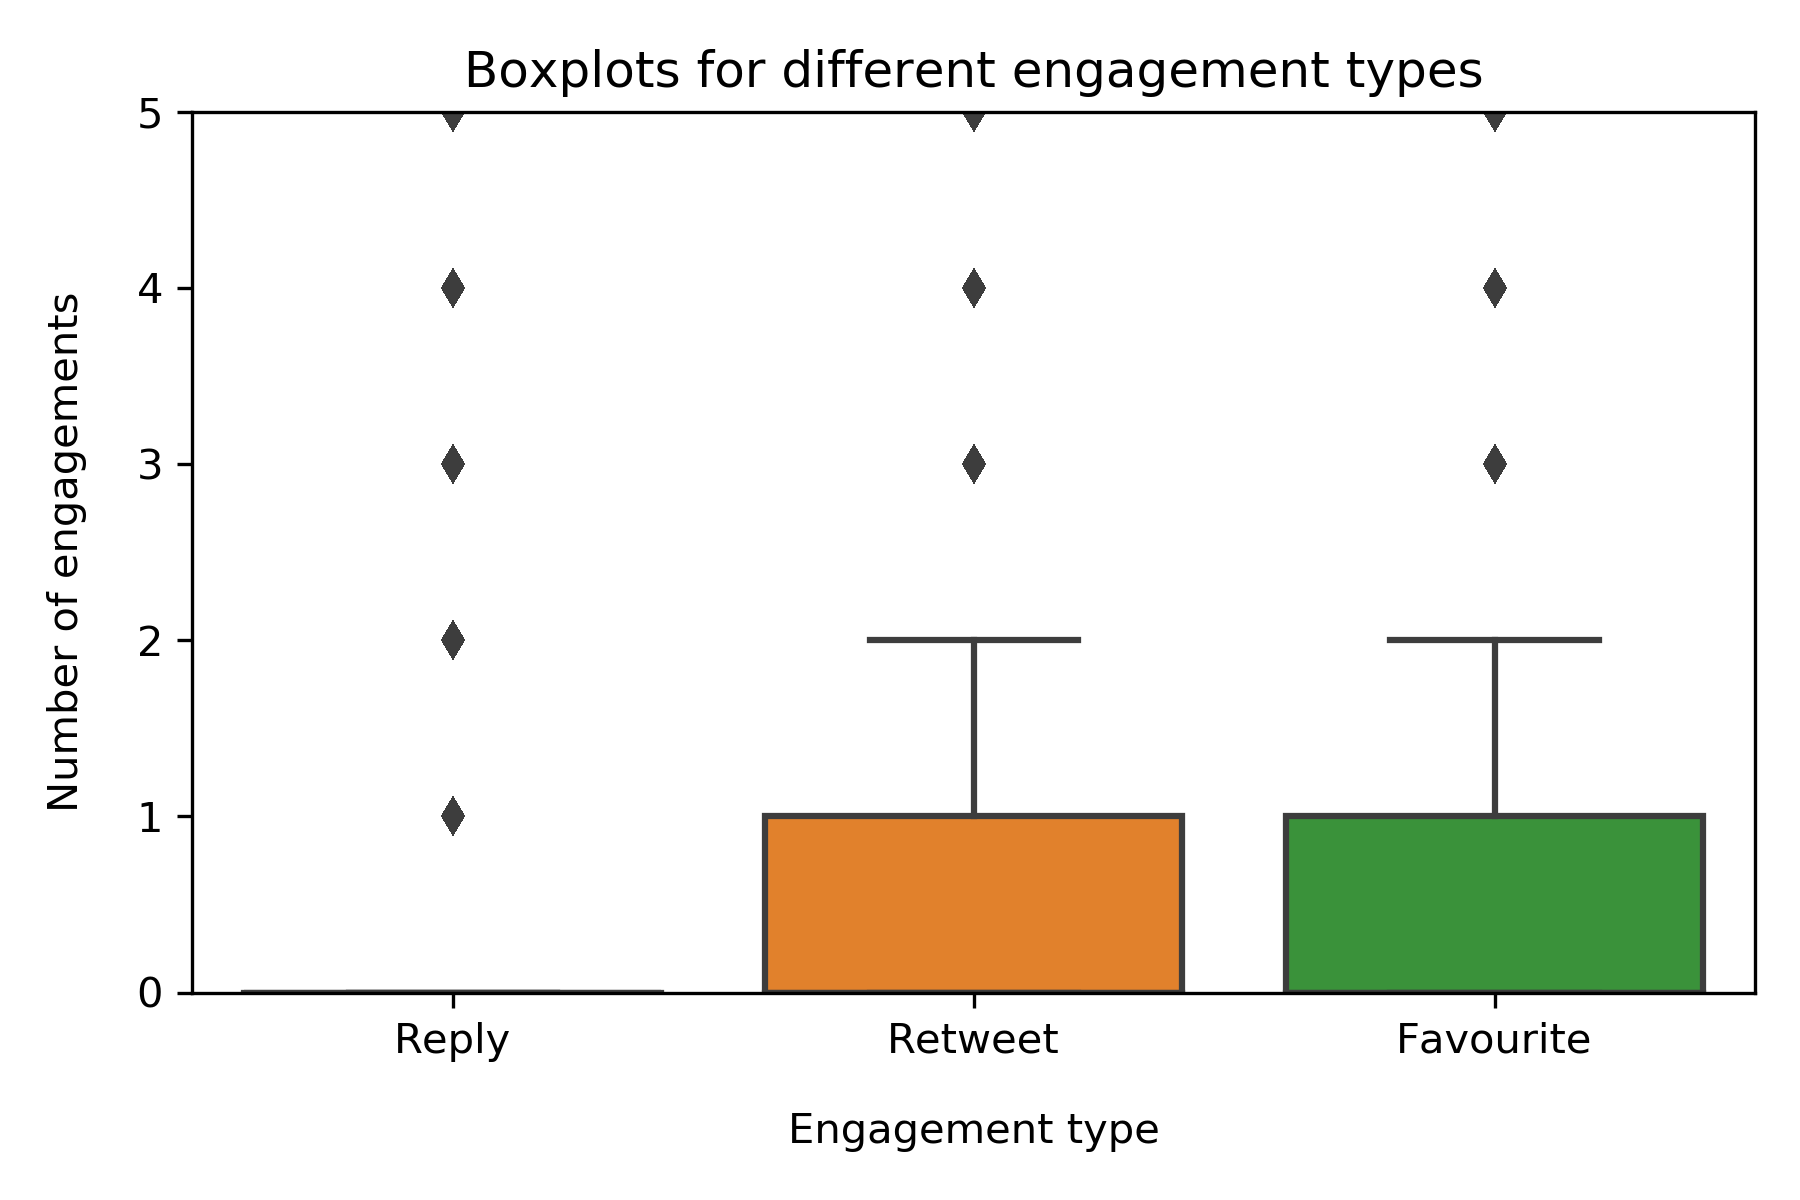

In [2]:
sum_stats = pd.read_pickle('pickle_files/sum_stats')
display(sum_stats)
Image(filename='images/summary_boxplot.png') 

### Scraping the data 

This section includes explanations and code with details on how the various datasets were scraped.

#### Core data (using the command line)
Twitter have restricted free developer accounts from accessing tweets (by text and tags) further than 7 days in the past. Moreover, the paid API service limits users to 100 daily tweets. These limitations are significant when attempting to perform analysis on more than 350000 tweets. For this reason, alternative scraping methods were utilised to obtain the core data. Marquisvictor's [GetOldTweets repository](https://github.com/marquisvictor/Optimized-Modified-GetOldTweets3-OMGOT) is used as an aid to scrape all tweets from the command line. In essence, this algorithm automates manual scrolling through Twitter. Given the required information, it scrapes Twitter data and metadata directly from the browser.

After installing the relevant packages, all tweets with the #FeesMustFall tag are saved into 4 csv files. Varying periods are used for each csv file to ensure that the scrape is not large enough to lead to a termination of the request. This procedure is carried out as indicated in the image below. Scraping the entire date range took approximately 21 hours.

![Method used to scrape all historical tweets](images/scrape_data.png "Scrape")



In [3]:
# Read core data into memory from the scraped csv files

path = r'../2019mt-st445-project-GregAdamMeyer' 
all_files = glob.glob(path + "/*.csv")

csv_li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    csv_li.append(df)

df = pd.concat(csv_li, axis=0, ignore_index=False)
df.head(3)

date     username   to  replies  retweets  favorites  \
0  31/10/2016 23:42  LesIzmoreKC  NaN        0         1          0   
1  31/10/2016 23:40   SupremeCFC  NaN        2         0          1   
2  31/10/2016 23:40    camaripop  NaN        0         0          0   

                                                text  geo      mentions  \
0  Seven university protests around the world tha...  NaN  @thedailyvox   
1  So now at CUT every student qualifies to write...  NaN           NaN   
2  Thought Factory: #FeesMustFall: So Why Shutdow...  NaN           NaN   

                                            hashtags            id  \
0                                      #FeesMustFall  7.930000e+17   
1                                      #FeesMustFall  7.930000e+17   
2  #FeesMustFall #SouthAfrica #BLM #leadership #i...  7.930000e+17   

                                           permalink  
0  https://twitter.com/LesIzmoreKC/status/7932366...  
1  https://twitter.com/SupremeCFC/status/79323619...  
2  https://twitter.com/camaripop/status/793236161...

#### Benchmark/auxiliary data (using the Twitter API)
         -- will be referred to as the benchmark data
This notebook proceeds to use the Twitter API to scrape tweets from random users who tweeted with the #FeesMustFall tag in the data above in order to draw conclusions about the engagement surrounding #FeesMustFall. Unlike the case with the core data, tweets older than 7 days can be scraped _using the API_ provided the search parameter is the user's screen name and not the tweet text. During the cleaning phase, I only take tweets from 4 months after the protests onwards to ensure this data is not related to #FeesMustFall and hence a good benchmark against which to compare the core data. Scraping the data below took approximately 1 hour.

In [4]:
# Scrape auxilary data from Twitter API and read it into memory

# Load credentials from json file
with open("../2019mt-st445-project-GregAdamMeyer/twitter_api.json", 
          "r") as file:
    secrets = json.load(file)

api_key = secrets['CONSUMER_KEY']
api_secret_key = secrets['CONSUMER_SECRET']
access_token = secrets['ACCESS_TOKEN']
access_token_secret = secrets['ACCESS_SECRET']

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
    
def get_tweets(screen_name):
    tweets = []
    # Initial request
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    tweets.extend(new_tweets)
    # Save the id of the oldest tweet less one to avoid duplication
    oldest = tweets[-1].id - 1
    # Extract tweets until there are none left
    while len(new_tweets) > 0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        tweets.extend(new_tweets)
        oldest = tweets[-1].id - 1
    
    # Transform array into a format that will be written to a csv file
    outtweets = [[tweet.created_at, tweet.text, tweet.favorite_count, tweet.retweet_count, 
                  tweet.in_reply_to_screen_name] for tweet in tweets]
    # Write to csv
    with open('../2019mt-st445-project-GregAdamMeyer/random_users/' 
            + '%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["created_at","text","favorites","retweets",
                         "in_reply_to"])
        writer.writerows(outtweets)

# Obtain a list of unique users who tweeted with the #FeesMustFall tag
users = set(df['username'])        

# Take 50 of the users above, get their most recent tweets and save them to csv files
# for count, user in enumerate(users):
#     get_tweets(user)
#     if count == 50:
#         break 

# Read the benchmark data into memory from the csv files
path = r'../2019mt-st445-project-GregAdamMeyer/random_users' 
user_files = glob.glob(path + "/*.csv")

csv_l = []

for users in user_files:
    df_rnd = pd.read_csv(users, index_col=None, header=0)
    csv_l.append(df_rnd)

df_rnd = pd.concat(csv_l, axis=0, ignore_index=False)
df_rnd.head(3)

created_at                                               text  \
0  2020-01-05 19:32:58  @ThatoMamathuba @tds122 Awwww Tony 💓❤ LOL we a...   
1  2020-01-05 19:27:56  @tds122 @ThatoMamathuba Yeah versus Eng it's 3...   
2  2020-01-05 19:23:45      @juliantsepo You do understand humour, right?   

   favorites  retweets     in_reply_to  
0          2         0  ThatoMamathuba  
1          2         0          tds122  
2          1         0     juliantsepo

### Cleaning the data
#### Core data

The following steps are carried out during the initial data clean:
1. Drop all duplicate rows that arise as a result of an overlap in web scrape dates.
2. Convert dates to datetime objects.
3. Remove all replies - for the purpose of this analysis, I am only interested in tweets. I store replies in an alternative dataframe which will be used for engagement analysis.
4. Drop unwanted columns
    - Since a user can optionally link their tweet to a geographic location, selecting tweets based on geotags significantly decreases the number of extracted tweets. For this reason, geographical analysis does not form part of this investigation.
    - Some preliminary analysis has shown that the scraping produced several tweets with the same ID - for this reason I drop the ID column and reference each tweet by an index number, sorted in chronological order.
5. Lastly, this notebook manipulates the dataframe to produce statistics summarising certain metrics of the data - the resulting figure from this code is the boxplot shown in the Dataset section.

Different versions of the core dataframe are required for different visualisations of the data. The initial data clean is done in this section, and further ad hoc data pivots, groupbys and other cleaning methods are performed throughout the notebook.

In [5]:
# Clean core data

# First drop the duplicates in each scraped csv due to overlapping scrape dates
# Subset by permalink as these links will be unique
df.drop_duplicates(keep = 'first', inplace = True, subset = 'permalink')
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df_replies = df[~df['to'].isnull()] # keep the replies in a different dataframe
df = df[df['to'].isnull()] # only want tweets that aren't replies
df.drop(columns=['to', 'geo', 'id'], inplace = True) # drop unwanted columns
df.sort_values(by = 'date' ,inplace = True)
df = df.reset_index()
df.drop(columns='index', inplace = True) # drop extra index column
display(df.head(3))
# df will remain unchanged and act as the core data - manipulations and pivots will be 
# performed on copies of this dataframe

# =======================================================================================

# Provide descriptive stats on the core data
sum_stats = df.describe()
# Improve formatting of summary stats
sum_stats.rename({'count': 'Tweet Count', 'mean': 'Average',
                 'std': 'Standard Deviation', 'min': 'Min value',
                 '25%': 'Lower Quartile (25%)', '50%': 'Median (50%)', 
                 '75%': 'Upper Quartile (75%)', 'max': 'Max value'},
                 axis='index', inplace = True)
sum_stats.rename({'replies': 'Replies', 'retweets': 'Retweets',
                 'favorites': 'Favourites'},
                 axis='columns', inplace = True)


# Save to pickle file so df can be shown in Dataset chapter
sum_stats.to_pickle('pickle_files/sum_stats')

engage_bplot1 = df[['replies']]
engage_bplot1 = engage_bplot1.rename({'replies': 'Num_engagements'} ,axis = 'columns')
engage_bplot1['Type'] = 'Reply'
engage_bplot2 = df[['retweets']]
engage_bplot2 = engage_bplot2.rename({'retweets': 'Num_engagements'} ,axis = 'columns')
engage_bplot2['Type'] = 'Retweet'
engage_bplot3 = df[['favorites']]
engage_bplot3 = engage_bplot3.rename({'favorites': 'Num_engagements'} ,axis = 'columns')
engage_bplot3['Type'] = 'Favourite'

engage_plot = engage_bplot1.append(engage_bplot2).append(engage_bplot3)

fig, ax = plt.subplots()
sns.boxplot(data=engage_plot, x = 'Type', y = 'Num_engagements')
plt.ylim(0,5)
plt.xlabel('Engagement type',labelpad = 12)
plt.ylabel('Number of engagements' ,labelpad = 12)
plt.title('Boxplots for different engagement types')
fig.tight_layout()
plt.savefig('images/summary_boxplot.png', dpi=300)
plt.close(fig)

date        username  replies  retweets  favorites  \
0 2015-03-21 14:28:00  SkhumbuzoTuswa        2         3          6   
1 2015-04-07 04:31:00        SSSIBIYA        0         1          3   
2 2015-10-13 17:07:00    SmartBlackZA        0         6          1   

                                                text      mentions  \
0  Priorities?? #FeesMustFall RT @informer_sa: UC...  @informer_sa   
1  #FEESMustFall that will make sense to me. Free...           NaN   
2  Now it is time for me to mobilize Wits student...           NaN   

                        hashtags  \
0  #FeesMustFall #RhodesMustFall   
1                  #FEESMustFall   
2                  #FeesMustFall   

                                           permalink  
0  https://twitter.com/SkhumbuzoTuswa/status/5792...  
1  https://twitter.com/SSSIBIYA/status/5852989398...  
2  https://twitter.com/SmartBlackZA/status/653980...

#### Benchmark data
The benchmark data is cleaned in a similar manner to the core data. However, due to the contrasting output format as a result of using the API, as well as the purpose for which this data is to be used, two additional steps are taken:

1. I only retain tweets occurring from February 2017 onwards to ensure that most tweets in this dataset are not linked to #FeesMustFall. This allows for comparison of the engagement distribution over time between #FeesMustFall tweets vs non #FeesMustFall tweets. 
2. The scraped dataset contains retweets - these tweets removed to focus on the analysis of original tweets. Retweets distort temporality and volume analysis.

In [6]:
# Clean benchmark tweet data

df_rnd['created_at'] = pd.to_datetime(df_rnd['created_at'])
df_rnd.head(15)
# Only want tweets from well after the protest to ensure that the bulk of 
# these tweets are not related to the #FeesMustFall topic - this will allow
# for a more accurate comparison 
df_rnd = df_rnd[df_rnd['created_at'] > dt.datetime(2017,2,1,0,0,0)]
df_rnd.drop_duplicates(inplace = True)
df_rnd = df_rnd[df_rnd['in_reply_to'].isnull()] # don't want tweets that are replies
# Dataset contains retweets - need to remove retweets to obtain only user original tweets
df_rnd = df_rnd.reset_index()
# Create a column with the first two letters of the tweet
df_rnd['first_2_letters'] = df_rnd['text'].astype(str).str[0:2]
# Remove retweets 
df_rnd = df_rnd[df_rnd['first_2_letters']!='RT']
df_rnd = df_rnd.reset_index()
df_rnd.drop(columns=['index', 'first_2_letters', 'level_0'], inplace = True)
df_rnd.tail(3)

created_at                                               text  \
27339 2017-02-03 12:18:00  one person followed me and one person unfollow...   
27340 2017-02-03 10:54:08  #Droogte: Dis mos nou hoe jy #reën vier! Boere...   
27341 2017-02-01 09:25:36  #RareKanker: Bloem-vrou sterf ná stryd teen ra...   

       favorites  retweets in_reply_to  
27339          0         0         NaN  
27340          0         0         NaN  
27341          0         0         NaN

#### Network data
This notebook proceeds to shape the core data for network analysis as well as scrape more data using the Twitter API. 
First, an undirected network is created. This is in the form of a list where each element consists of two connected nodes in set format. Nodes/users are considered to be connected in a #FeesMustFall context if the users have interacted via mentions or replies. A network with 112011 edges is obtained.

Next, I create a dictionary of all users in the core data with each user's corresponding follower count as the dictionary value. This will be used to limit the network analysis to __500__ users. Not only does this aid visualisation, but it also allows me to restrict the network analysis to users with far reach.



MAYBE EXPLAIN STEPS IN CLEANING PROCESS BELOW - IF YOU HAVE TIME, GIVE WEIGHTS BASED ON NUMBER BUT DO THIS IN A DIFFERENT NOTEBOOK
OF INTERACTIONS 

The following steps were taken to clean and shape the data for network analysis:

1. Subset *df* to contain rows where mentions are made.
2. Cycle through this dataframe (*df_nx*) and the replies dataframe (*df_replies*) adding required edges to the *ntwrk* array. When adding edges from *df_nx*, the *parse_mentions* function is used to remove unwanted characters.
3. Lastly, follower counts for all users found in the network are scraped using the Twitter API. HOWEVE MENTION IF SOME FOLLOWERS CANT BE SCRAPED

In [7]:
# Create network of nodes and edges

# First, create a network consisting of all users
# Later on, trim the network to include high profile users using the dict above

# Subset tweets that have mentions
df_nx = df[~df['mentions'].isnull()][['username', 'mentions']]
df_nx.reset_index(inplace = True)
df_nx.drop(columns = 'index', inplace = True)

def parse_mentions(mentions):
    '''Parses all the mentions for a specific tweet
    as a list and removes the @ symbol'''
    m_list = mentions.split()
    for i in range(len(m_list)):
        m_list[i] = m_list[i].lstrip('@')
    
    return m_list

# Cycle through all user/mention combinations and add them
# to the ntwrk list if they are not already there
ntwrk = []
for entry in df_nx.itertuples():
    for each_mention in parse_mentions(entry.mentions):
        n_edge = {entry.username, each_mention}
        if n_edge not in ntwrk:
            ntwrk.append(n_edge)

# Next, cycle through all user replies and add them to the ntwrk
# list if they are not already there
df_replies = df_replies[['username', 'to']]
for entry in df_replies.itertuples():
    n_edge = {entry.username, entry.to}
    if n_edge not in ntwrk:
        ntwrk.append(n_edge)

# Remove people who mention/reply to themselves
ntwrk_no_self_mentioners = []
for i in ntwrk:
    if len(i) == 2:
        ntwrk_no_self_mentioners.append(i)
        
ntwrk = ntwrk_no_self_mentioners

#==============================================================================
# Now, create a dictionary of all users follower counts to limit the network
# analysis later on in the notebook

# Update users after core clean has been performed
users = set(df['username']) 
# Create a dict of users and corresponding follower counts scraped from Twitter
# This process took 52 hours and misses several users due to Twitter's rate limits
follow_dict = {}
user_not_found = []

for each_user in users:
    try:
        user_info = api.get_user(each_user)
        follow_dict[user_info.screen_name] = user_info.followers_count
    except:
        user_not_found.append(each_user)
        
with open('pickle_files/follow_dict.pickle', 'wb') as handle:
    pickle.dump(follow_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# # Due to Twitters rate limits, the previous scrape did not return all required users
# # Obtain the remaining users below:
# with open('pickle_files/follow_dict.pickle', 'rb') as handle:
#     follow_dict = pickle.load(handle)

# # 5858 users not found (length of user_not_found list)
# user_not_found1 = []
# for each_user in user_not_found:
#     try:
#         user_info = api.get_user(each_user)
#         follow_dict[user_info.screen_name] = user_info.followers_count
#     except:
#         user_not_found1.append(each_user)   
        
# # 495 users still not found

# user_not_found2 = []
# for each_user in user_not_found1:
#     try:
#         user_info = api.get_user(each_user)
#         follow_dict[user_info.screen_name] = user_info.followers_count
#     except:
#         user_not_found2.append(each_user)
        
# # 272 users still not found

# user_not_found3 = []
# for each_user in user_not_found2:
#     try:
#         user_info = api.get_user(each_user)
#         follow_dict[user_info.screen_name] = user_info.followers_count
#     except:
#         user_not_found3.append(each_user)
        
# with open('pickle_files/updated_follow_dict.pickle', 'wb') as handle:
#     pickle.dump(follow_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
# # 272 users still not found

# # Some desktop research showed that all 263 users have deleted their accounts 
# # follow_dict is not updated further

In [ ]:
# Due to Twitters rate limits, the previous scrape did not return all required users
# Moreover, there are users who were replied to but did not tweet that haven't been extracted
# Remaining users are obtained below:
with open('pickle_files/follow_dict.pickle', 'rb') as handle:
    follow_dict = pickle.load(handle)

cnt = 0
for node1, node2 in ntwrk:
    if node1 not in follow_dict:
        try:
            user_info = api.get_user(node1)
            follow_dict[user_info.screen_name] = user_info.followers_count
        except:
            cnt+=1
    if node2 not in follow_dict:
        try:
            user_info = api.get_user(node2)
            follow_dict[user_info.screen_name] = user_info.followers_count
        except:
            cnt+=1  

# cnt = 14624 users in the ntwrk data still not found

# Rerun code above to obtain missing users
cnt = 0
for node1, node2 in ntwrk:
    if node1 not in follow_dict:
        try:
            user_info = api.get_user(node1)
            follow_dict[user_info.screen_name] = user_info.followers_count
        except:
            cnt+=1
    if node2 not in follow_dict:
        try:
            user_info = api.get_user(node2)
            follow_dict[user_info.screen_name] = user_info.followers_count
        except:
            cnt+=1  


# Some desktop research showed that all 263 users have deleted their accounts 
# follow_dict is not updated further

## Visualising the data

### Unfolding of events (Objective 1 - WHEN YOU FINISHED, LABEL OTHER OBJECTIVES IN HEADINGS)
The #FeesMustFall movement kicked off after the announcement that university fees for 2016 would increase by 10.5%. POTENTIALLY INCLUDE A STRONG WORDED TWEET HERE 

This section explores whether the prominence of the #FeesMustFall movement and periods of intense protest was linked to the number of tweets over time. 

In [93]:
# Create data for volume plots
df_man = df.iloc[:]
df_man['date'] = df['date'].dt.floor('T') # remove seconds - allows for better plot visualisation
df_man['date_temp'] = [i.date() for i in df_man['date']]
volume = (df_man.groupby('date_temp')['username'].count())
# Create a df to be used by the interactive plot

In [94]:
# volume
# NBNBNB fix lines and dates below WHEN YOU GET YOUR TIMELINE BOOK
# volume_time
volume_df = pd.DataFrame(volume)
volume_df = volume_df.rename({'username': 'tweet_count'} ,axis = 'columns')
volume_df['date'] = volume_df.index
volume_df['year'] = volume_df['date'].map(lambda x: x.year)
volume_df['month'] = volume_df['date'].map(lambda x: x.month)

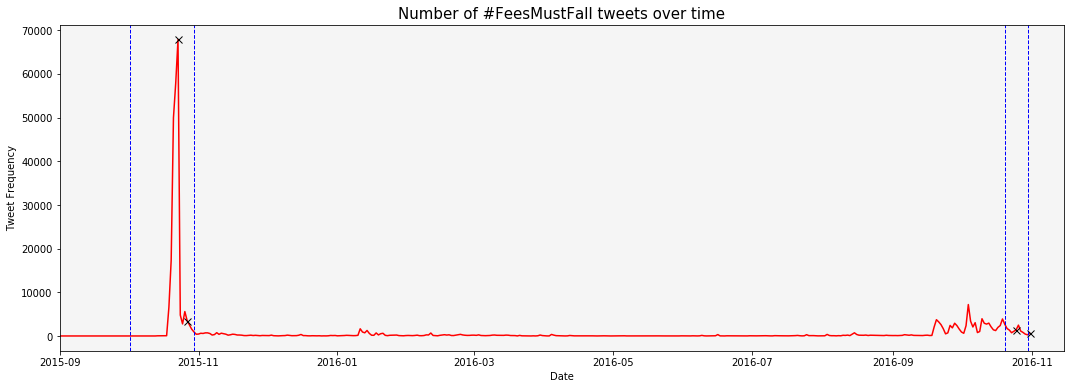

In [96]:
register_matplotlib_converters()
# Volume of tweets by date
fig, ax = plt.subplots(figsize=(18, 6))
# Markers on the dates of significant events
signif_pnts = [12,16,380,386] # LOOK AT THE SERIES AND WHAT NUMBER ON THE X-AXIS THE DATE YOU NEED IS 
# NB - BETTER TO FIND OUT HOW TO MARK ON PLOT USING X-AXIS. BECAUSE DONT HAVE Y-VALUES FOR ALL 
# THE EVENT DATES

plt.plot(volume,'r', markevery = signif_pnts, markersize = 7, marker = 'x',
        markeredgecolor = 'k', )
plt.title('Number of #FeesMustFall tweets over time', fontsize = 15)
ax.set_facecolor('whitesmoke')
plt.xlabel('Date')
plt.ylabel('Tweet Frequency')
plt.xlim([dt.date(2015,9,1), dt.date(2016,11,15)])
# Dates in between most of the protest action occurred
plt.axvline(dt.date(2015, 10, 2), color='b', linestyle='dashed', linewidth=1)
plt.axvline(dt.date(2015, 10, 30), color='b', linestyle='dashed', linewidth=1)
plt.axvline(dt.date(2016, 10, 20), color='b', linestyle='dashed', linewidth=1)
plt.axvline(dt.date(2016, 10, 30), color='b', linestyle='dashed', linewidth=1)

plt.show()

Given information surrounding pivotal events in the movement, it becomes clear that there is a strong correlation between tweet frequency and protest action. The significant events corresponding to the **'X'** marks on the figure above are described below:

1. 14 September 2015: The first protests voicing student dissatisfaction with high fees occurs at UKZN. Students set fire to buildings and engage in battles with police and security. The #FeesMustFall tag is yet to be created as evidenced by the figure above.



It can be concluded that a spike in tweets with the tag #FeesMustFall was likely to occur just before protest action or a defining event. It is clear that there is a strong link between Twitter activity and protest action. SOMEHOW SPLIT THIS CONCLUSION BETWEEN HERE AND HOURLY GRAPH.




Discuss reasons why the second season was not as popular - also, trend was more stable because people were expecting another protest. Lots of tweets over a longer period of time in 2016 where as 2015 there were a lot at once.

In [97]:
# KEEP PLOT ABOVE WITH EVENTS ON IT BUT FIX THIS UP - POTENTIALLY JUST COMPARE THE CORRESPONDING
# MONTHS ACROSS THE TWO YEARS 

volume

fig = px.line(volume_df, x = 'date', y = 'tweet_count', 
              title='Number of #FeesMustFall tweets over time',
             color = 'year')
fig.update_layout(xaxis_title="Date", yaxis_title="Tweet Frequency")

fig.show()

### Twitter as a tool to mobilise protestors

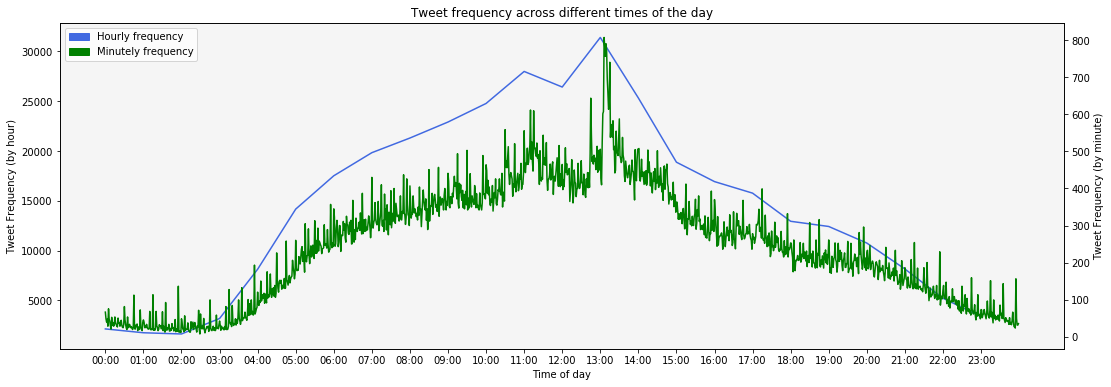

In [98]:
# Group tweets by the time of day they were tweeted
df_man['time_temp'] = [i.time() for i in df_man['date']]
volume_time = df_man.groupby('time_temp').size()

# CAN POTENTIALLY DO THIS FOR JUST THE PROTEST DATES
# Create a list of the hourly count of tweets over the entire date range
hourly_count = []
freq = 0
for time, frequency in zip(volume_time.index, volume_time):
    freq += frequency
    if time.minute == 59:
        hourly_count.append(freq)
        freq = 0

# Create a simple list of date time objects for every hour
hour_list = []
for hour in range(24):
    hour_list.append(dt.time(hour, 0, 0))
    
fig, ax = plt.subplots(figsize=(18, 6))    

ax.plot(hour_list, hourly_count, 'royalblue')
ax.set_xlabel("Time of day")
ax.set_ylabel("Tweet Frequency (by hour)")
ax.set_title("Tweet frequency across different times of the day")
ax.set_facecolor('whitesmoke')
ax.set_label('Minutely frequency')


ax2 = ax.twinx()
ax2.plot(volume_time, 'g')
ax2.set_ylabel('Tweet Frequency (by minute)')
ax2.set_xticks([dt.time(hour, 0, 0) for hour in range(24)])

green_patch = mpatches.Patch(color='g', label='Minutely frequency')
r_blue_patch = mpatches.Patch(color='royalblue', label='Hourly frequency')
plt.legend(handles=[r_blue_patch, green_patch], loc = 'upper left')

plt.show()

# Delete these temporary data frames and series - they take up memory and can be created
# again if required

Obvious spike around midday which is when most of the protests occur. Blue hourly plot corresponds to y-axis on the left side and gives a better idea of the shape. It's clear tweets spike around midday - i.e. protest time. POTENTIALLY INCLUDE A RANDOM SAMPLE OF TWEETS HERE 

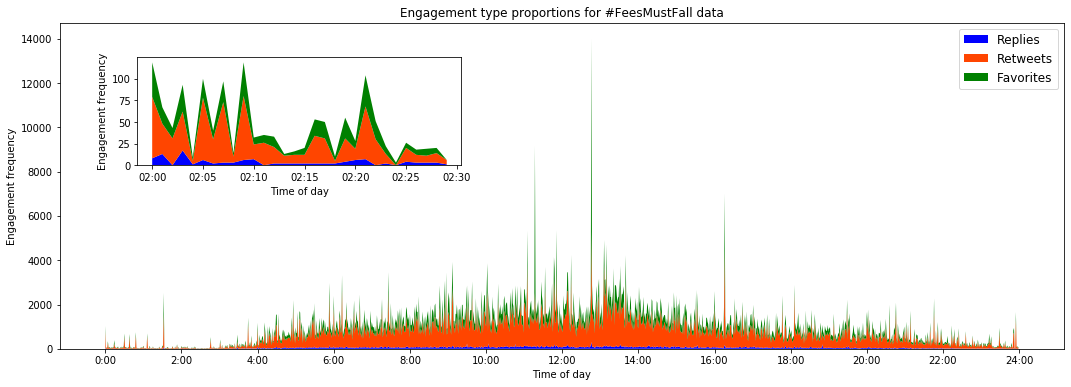

In [99]:
engage = df_man.groupby('time_temp')['replies', 'retweets', 'favorites'].sum()


# bins = range(24*60+1)
labs = ['Replies', 'Retweets', 'Favorites']
plt.figure(figsize=(18,6))
plt.stackplot(engage.index, engage['replies'], engage['retweets'], engage['favorites'], 
              labels = labs, colors = ['blue', 'orangered', 'green'])
plt.legend(fontsize = 12)
plt.xticks(3600*np.arange(0, 26, 2), ('0:00', '2:00', '4:00', '6:00', '8:00', 
                                      '10:00', '12:00', '14:00', '16:00', 
                                      '18:00', '20:00', '22:00', '24:00'))
plt.xlabel('Time of day')
plt.ylabel('Engagement frequency')
plt.title('Engagement type proportions for #FeesMustFall data')

# Plot zoomed figure
engage_zoom = engage[2*60:2*60+30]
sub_axes = plt.axes([.185, .55, .25, .25]) # location on original graph
sub_axes.stackplot(engage_zoom.index, engage_zoom['replies'], engage_zoom['retweets'], 
              engage_zoom['favorites'], labels = labs, colors = ['blue', 'orangered', 'green'])
sub_axes.set_xticks([dt.time(2, 5*minute, 0) for minute in range(7)])
sub_axes.set_xlabel('Time of day')
sub_axes.set_ylabel('Engagement frequency')
# plt.xlim([0, dt.time(6,0,0)])

plt.show()

del df_man
del volume
del volume_df

Above, the notebook looks at the engagement of these tweets around midday by analysing the split between likes, replies and retweets per tweet. _Replies_ are a form of __active__ engagement where the user is looking to engage in discussion whereas _likes and retweets_ function as a means to __spread a message__ or express agreement with the tweet in question. The zoomed in plot demonstrates that #FeesMustFall related tweets are predominantly engaged via retweets, even at low engagement frequency hours of the day.

Data in the second plot is taken from a sample of users who actively tweeted about #FeesMustFall. However, the data in question involves these users tweets from 6 months after the protests until 2020/01/05. This allows for meaningful engagement comparisom. Unfortunately, one requires a premium API subscription to access the reply count [(evidenced here)](https://stackoverflow.com/questions/47851662/reply-count-attribute-missing-from-tweet-object) and so replies are excluded as a metric in the second plot.

It is evident that retweets for a much smaller proportion of the engagement when the topic is not #FeesMustFall suggesting...

In [ ]:
# Plot engagement for benchmark twitter data 
# Remove seconds - allows for better plot visualisation
df_rnd['created_at'] = df_rnd['created_at'].dt.floor('T') 
df_rnd['time_temp'] = [i.time() for i in df_rnd['created_at']]
rnd_tweets = df_rnd.groupby('time_temp')['retweets', 'favorites'].sum()
# Group the stackplot data by hour as a result of the large fluctuation in the minutely data
rnd_tweets['index'] = rnd_tweets.index
rnd_tweets['hour'] = rnd_tweets['index'].apply(lambda x: x.hour)
rnd_tweets = rnd_tweets.groupby('hour')['retweets', 'favorites'].sum()
rnd_tweets

rnd_labs = ['Retweets', 'Favorites']
plt.figure(figsize=(18,6))
plt.stackplot(rnd_tweets.index, rnd_tweets['retweets'], 
              rnd_tweets['favorites'], labels = rnd_labs,
             colors = ['orangered', 'green'])

#FIX THIS 24 HOUR GRAPH PROBLEM - you've used 0.958 to fix problem as a hack  
plt.xticks(0.958*np.arange(0, 26, 2), ('0:00', '2:00', '4:00', '6:00', '8:00', 
                                      '10:00', '12:00', '14:00', '16:00', 
                                      '18:00', '20:00', '22:00', '24:00'))

plt.legend()
plt.xlabel('Time of day')
plt.ylabel('Engagement frequency')
plt.title('Engagement type proportions for benchmark data')

plt.show()

### Network analysis

This notebook proceeds to analyse interactions and influential users and communities by analysing the Twitter data. Using the ntwrk data, the following key statistics within the network are calculated:
1. __Total nodes and egdes:__ in the network to give an idea of the scope of users and interconnectedness between them
2. __Information on the degree of notable nodes:__ the degree refers to the number of edges a particular node has 
3. __Number of connected components in the graph:__ this refers to the number of subgraphs in which a path exists between every node 
4. __Largest subgraph:__ this notebook focuses on analysing the largest connected subgraph
5. __Clustering and transitivity:__ these are both measures of the degree to which nodes tend to cluster together and hence are useful for determining whether users create tightly-knit groups. Clustering places high emphasis on low-degree nodes whereas transitivity emphasises the lower degree nodes. More information on these measures can be found [here](https://en.wikipedia.org/wiki/Clustering_coefficient) ADD IN ANALYSIS: The clustering co-efficient is larger suggesting that there is some tendency for the high degree nodes to form small clusters.

To best visualise the network structure, the network of the largest connected subgraph is depicted. This gives insight into the interactions between the most active users during the #FeesMustFall campaign.

In [ ]:
# Perform network analysis on #FeesMustFall users
 
# Create graph by adding edges from ntwrk
G = nx.Graph()

for node_1, node_2 in ntwrk:
    G.add_edge(node_1, node_2, weight=1)
    
print("The graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
degrees = [val for (node, val) in G.degree()]
# The degree of a node is how many nodes it is connected to
# Max degree of graph is how many connections the node with the most connections has
# CREATE A TABLE IN PYTHON WITH THE INFO BELOW
print("Max degree of graph is", np.max(degrees))   
print("Min degree of graph is", np.min(degrees))
print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")
print(nx.is_connected(G)) # graph isn't connected
print(nx.number_connected_components(G), "connected components")
largest_subgraph = max(nx.connected_component_subgraphs(G), key=len)
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} \
edges present in the largest component of the Graph")

print(f"The average clustering coefficient is {nx.average_clustering(largest_subgraph)} in the largest subgraph")
print(f"The transitivity of the largest subgraph is {nx.transitivity(largest_subgraph)}")

# Block of code below took 4 hours to run 
print(f"The diameter of the Graph is {nx.diameter(largest_subgraph)}")
print(f"The average distance between any two nodes is {nx.average_shortest_path_length(largest_subgraph):.2f}")
# The diameter of the Graph is 18
# The average distance between any two nodes is 4.66

graph_centrality = nx.degree_centrality(largest_subgraph)
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(largest_subgraph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))
graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))
print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the Graph")
# the node with id eNCA has a degree centrality of 0.05 which is the maximum of the Graph
# the node with id eNCA has a closeness centrality of 0.35 which is the maximum of the Graph
# the node with id eNCA has a betweenness centrality of 0.16 which is the maximum of the Graph
# Took 24 hours to run above code


In [ ]:
# Position nodes using Fruchterman-Reingold force-directed algorithm.
# Finding the centrality measures and plotting the network took approx 11 hours

node_and_degree = largest_subgraph.degree()
colors_central_node = ['red']
central_nodes = ['eNCA']

pos = nx.spring_layout(largest_subgraph, k=0.05)
fig = plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(largest_subgraph.number_of_nodes()), 
        cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, 
        with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, node_size=300, 
                       node_color=colors_central_node)

fig.savefig("images/full_network.png", bbox_inches='tight', dpi=600)

Image(filename="images/full_network.png") 

# NBNBNB CONSIDER ADDING NODES THAT ARE USERNAMES THAT HAVE INTERACTED WITH NOBODY BUT HAVE MANY FOLLOWERS
# AND HAVE TWEETED

In [37]:
with open('pickle_files/updated_follow_dict.pickle', 'rb') as handle:
    follow_dict = pickle.load(handle)
pop_ntwrk = []
pop_edge_ignored = []
for node_1, node_2 in ntwrk:
    try:
        if follow_dict[node_1]>2000000 or follow_dict[node_2]>2000000:
            pop_ntwrk.append([node1, node2])
    except:
        pop_users_ignored.append([[node1, node2]])
          
# EXTRA CHECK:
print(len(pop_ntwrk)+len(pop_users_ignored))# SHOULD EQUAL LEN(NTWRK)

['informer_sa', 'SkhumbuzoTuswa']
['WitsUniversity', 'SediButhez']
['DjDcoolDiamond', 'colleges']
['DjDcoolDiamond', 'WITS']
['MandisaTshuta', 'Ncepsi']
['LwaziPakade', 'SthembileCel']
['Cde_Xolani', 'UPSRC_']
['Cde_Xolani', 'StelSRc']
['WitsSRC', 'KeMalesela']
['KeMalesela', 'Wits_ARC']
['Cde_Xolani', 'WitsUniversity']
['Cde_Xolani', 'UPTuks']
['DASONMMU', 'Tee_Sitolotolo']
['DAYoungLeaders', 'Tee_Sitolotolo']
['SlieAfrica', 'palesamorudu']
['Mngxitama', 'BIack1stLand1st']
['DonaldMahlangu', 'MyANC_']
['AliciaJali', 'HonourableHloni']
['RhodesMustfall', 'Harold_Ferwood']
['karabzy', 'Pretoria']
['The_Real_Bafana', 'maths00001']
['RichardBruneSA', 'MyANC_']
['mamzmolepo', 'gigaba__']
['LufefeMalala', 'gigaba__']
['Siya_Njica', 'gigaba__']
['kamva_somdyala', 'IngeBeukes13']
['kamva_somdyala', 'MizzFumi_K']
['Mphok_Stofile', 'BladeNzimandeMP']
['eNCA', 'RoscoeJacobs']
['RoscoeJacobs', 'ANN7tv']
['uManqobaM', 'UCTCollegeOfAcc']
['PGDAStudent2015', 'uManqobaM']
['jaarsveld_C', 'DASOTuks']


['NahXbruh', 'akaworldwide']
['May_Phila', 'BladeNzimandeMP']
['MyANC_', 'Mr_namza']
['ZuluJoziGuy', '__XOLXNI']
['ZuluJoziGuy', 'TheeOnly_Tee']
['News24', 'ZaahiraYelena']
['MoreroaMoses', 'akaworldwide']
['MoreroaMoses', 'our']
['Rochelle_Shady', '__XOLXNI']
['Rochelle_Shady', 'TheeOnly_Tee']
['Nkokhelo_M', 'Sibulibu']
['TumiGobetse', 'iAmThatGuy__']
['Ek_Jacquelyn', '__XOLXNI']
['Ek_Jacquelyn', 'TheeOnly_Tee']
['Vodacom', 'EugeneNyawo']
['S_Fluxx', 'akaworldwide']
['akaworldwide', 'FunekaSibande']
['sah_biyela411', '_uSphe']
['Mthizo_Saxo', 'Kwandi_14']
['LuncedoFC', 'Kwandi_14']
['Fifi_DM101', 'Miz_Yoyo']
['HeezyTheDon', 'Dark_Weekday']
['Dark_Weekday', 'Lelo_Laylow']
['Dark_Weekday', 'Newks_deepic']
['massism_SA', 'kanyewest']
['massism_SA', 'akaworldwide']
['WitsSRC', 'bulali']
['bulali', 'HeavyDeem']
['Bongani_MV', 'TheeOnly_Tee']
['Caspar_Lee', 'Thapar11']
['_beingcam', 'Phil_McMay']
['_beingcam', 'BladeNzimandeMP']
['Savo_Heleta', 'PresidencyZA']
['Savo_Heleta', 'MyANC_']
['Le

['MayorOfTshwane', 'mbindwane']
['MTshwete', 'mbindwane']
['ANCMPS', 'mbindwane']
['NalediSowazzz', 'MiniRadebe_xo']
['aQuelle', 'MoJudee']
['safmmiddaylive', 'tmkananda']
['mcdeetsotetsi', 'Trevornoah']
['HlumeloSibeko', 'redbullSA']
['MrSoulful_X', 'UJAPK']
['lesterkk', 'Zoe_Goduka']
['Nani__Ras', 'JHBSTUDENTS']
['WitsUniversity', 'Yonela_NM']
['YongamaS', 'Sentletsepic']
['ewnreporter', 'abed_v1pic']
['jeangleroux', 'thedailyvoxpic']
['NestleSA', 'MoJudee']
['CEOCSMedical', 'Mdu_Gama']
['balaamse', 'pjchudson']
['MyANC_', 'DaciousNchoe']
['eNCA', 'Buza_junior']
['shakantkz', 'CassperNyovest']
['MeLighty', 'TashJoeZA']
['BeastyZA', 'thunderkitkat']
['shakantkz', 'MTNza']
['YouTube', 'SizzleOndaBass']
['StacySaunders07', 'sisekomkalipi']
['PhiwahJnr', 'ukhozi_fm']
['Mijeaux', 'janaaier']
['Brand_SA', 'Nhonho_Mbebe']
['EconFreedomZApic', 'Buza_junior']
['Nnzwi_', 'menshinlight']
['ANN7tv', 'julias_makamu']
['NandosSA', 'oldmanmemory']
['sphamtambo', 'C_Lungaspic']
['missmalumo', 'MyANC

['EkseLetsTalk', 'Valery02MTH']
['thamsanqabengu', 'chef']
['peter_mzwandile', 'Julius_S_Malema']
['vimhaiv', 'sa0556351']
['Scopioimages', 'Thato_Musique']
['ShaunKing', 'MsLerato_N']
['SiphiwoNzawumbi', 'b57878dd356f422']
['eNCA', 'Owz_K']
['MahlabaMathonto', 'MyANC_']
['TABRAT21', 'ItsCootso']
['MyANC_', 'mashabelane']
['Kgothalo_T', 'MyANC_']
['Apelele_salt', '_sjokojoko']
['Wits', 'TheNamesKDot']
['DzuWe', 'CarlaKatjie']
['DjCalypsoMusic', 'DynamiQ_DJLuoda']
['Cavon1', 'DjCalypsoMusic']
['SollyMalebana', 'DjCalypsoMusic']
['Julius_S_Malema', 'The_Real_T_Bang']
['EconFreedomZA', 'The_Real_T_Bang']
['AsijikiBrigade', 'nsmkhonza']
['InkuluFreeHeid', 'Kgotsi22']
['fifi_babee', 'MusicallyDani']
['LeratoMatsoso', 'msmasasa']
['News24', 'massenya']
['shazza_razza', 'CarlaKatjie']
['sarah_koopman', 'shazza_razza']
['raymondapples', 'NorthCliff']
['Intemnandi', 'MyANC_']
['eNCA', 'NickolausBauer']
['Tshidacks', 'MyANC_']
['EconFreedomZA', 'Tshidacks']
['TKZN_totoby', 'Turfloop']
['MyANC_',

['WitsUniversity', 'Mpazz1']
['_Cosatu', '_uPrince']
['SPHadebe', 'BoNiCe_M']
['TichyPooh', 'Ayabukwa_']
['MyANC_', 'emms4sure']
['TumiZwane18', 'CNN']
['Pirates1stlady', 'SPHadebe']
['Zvndeay', 'CNN']
['zama_mdluli', 'PresidencyZA']
['JustNqaba', 'SizweDhlomo']
['UCTJustKidding', 'Tlhogi_Dube']
['tonyRYmananza', 'Julius_S_Malema']
['tonyRYmananza', 'AdvDali_Mpofupic']
['PuffingPea', 'RaphaelaBohmer']
['Somila_Mtiya', 'SPHadebe']
['LAW_yal', 'NonhleBeryl']
['KhayeNgema', 'Jack_Rams']
['MusicUnscriptd', 'nothende']
['sangxa', 'Sir_Bu']
['VERNON_GT', 'TomiRecords']
['Petunia_TheOne', 'DPRamaphosapic']
['AndileMbeleFUX', 'Julius_S_Malema']
['JohannavanEeden', 'MaygeneD']
['alet87', 'JohannavanEeden']
['noMoreANCcrime', 'SABMiller']
['noMoreANCcrime', 'AGRIForums']
['FuzeNomcebo', 'firstshane']
['FuzeNomcebo', 'Ayabukwa_']
['PresidencyZA', 'Godfreymatentsh']
['FuzeNomcebo', 'UJAPK_SRC']
['lesterkk', 'NickolausBauer']
['CellC', 'IAMserf']
['OfficialCSA', 'Cfa89']
['MelvinMsezane', 'Pontsho_

['', 'Joan_Siki']
['ipetitions', 'yay_mo']
['Noxbuhle', 'Zee_Mashiyane']
['fpmothoa93', 'Siya_Mdingi']
['fpmothoa93', 'NRManyisapic']
['WitsSRC', 'Tshepo_Ndlovu']
['MyANC_', 'thatwallace']
['Grantpascoepic', 'thatwallace']
['Buliem29', 'RediTlhabipic']
['GCombrink22', 'SAPresident']
['VibeRadioSA', 'LanceAPetersen']
['MarvinDraai', 'PresidencyZA']
['imraanchristian', 'DonovanGoliath']
['RealJoleneRoup', 'SAPresident']
['Laylah_Fay', 'ThaabitManan']
['SimukelisoM', 'MyANC_']
['feliciamuwayi', 'Official_MissSA']
['KyleOliver633', 'ohso_nalz']
['Mojalefa_ZA', 'JeSuisWiseman']
['Mojalefa_ZA', 'Varsity']
['juju_junior11', 'fanoy_m']
['NotYetUhuru', 'yamalisa']
['SekubediT', 'MyANC_']
['Ruu_SA', 'Mel_Mzansi']
['ActualGuestKay', 'Porsche_N']
['eNCA', 'AvronN_Beaumont']
['Oprah', 'Yola_TheWay']
['SAPresident', 'KingGedlela']
['News24', '_CrystalAugust']
['YouthinactionSA', 'kzngov']
['', 'YouthinactionSA']
['MyANC_', 'TherealKwizera']
['simbasambo1', 'imanrapeti']
['KukieMonroe_', '_mphoranko'

['UJSRC', 'VukaMngani']
['OfficialNelisa', 'Kanyisile_']
['NoniGasa', 'Tru_Royalty21']
['CPUT', 'Tru_Royalty21']
['Nativtrees', 'MyANC']
['VsVnda', 'Letukile_M']
['THESALSASTUDIO', 'YouTube']
['DA_Youthpic', 'clintsepp']
['AndreHoffman', 'NtandoKemiso']
['REALDARKCHILD', 'NAMBITHA']
['REALDARKCHILD', 'NaakMusiQ']
['REALDARKCHILD', 'Mandla1Gad']
['REALDARKCHILD', 'AtandwaKani']
['DeliHoneybun', 'CafeHoneybun']
['SodasPiece', 'tut']
['SodasPiece', 'ukzn']
['Department', 'Pcrazy_xhirame']
['NwiseWise', 'XabisoMB']
['akaworldwide', 'Nelz_SA']
['Crutch4https', 'CollardStudies']
['NteoPrudence', 'Letukile_M']
['Yolisatsotso', 'Zakhele']
['Zakhele', 'MissLopi']
['winniemandela', 'Zakhele']
['CosmopolitanSA', 'MizzFumi_K']
['eNCA', 'MsDeeDee_k']
['ENewspic', 'MsDeeDee_k']
['eNCApic', 'JozaBeatZ']
['SamaT_music', 'Letukile_M']
['LindohMjoli', 'Julius_S_Malema']
['sexyboy_spha', 'eNCA']
['ke_nna_Faith', 'Infinite67']
['mlilo2go', 'chevroletsa']
['RudiMalcolm', 'Romeo_Simelane']
['Grant_za', 'MyA

['Johannesburg', 'd0_ritoz']
['neriahlakotsaStudents', 'gillyworks']
['Truu_Black', 'MTNza']
['Vodacom', 'Truu_Black']
['CellC', 'Truu_Black']
['Cape', 'Matt_Maekela']
['shephan7', 'RudiMalcolm']
['holford_kay', 'bonang_m']
['justmzeeAgain', 'TomiRecords']
['ALehohla', 'lindylanga']
['ALehohla', 'Moey_Hansa707']
['ElzaanJ28', 'BreakingNews']
['ElzaanJ28', 'News24']
['karlowitch', 'Trevornoah']
['Sand_Man7', 'MunieMoo']
['PrettyMpaks', 'SAPresidentpic']
['YouTube', 'anonamikeza']
['tasout23', 'MyANC_']
['MsTumelo', 'MyANC_']
['witssrc', 'andilethereader']
['andilethereader', 'dailyvox']
['politicsweb', 'UfahamuJournal']
['Lelo_Cee', 'Naso_Jaye']
['Brother_TP', 'Naso_Jaye']
['skyreid', 'washingtonpost']
['ChaysVD', 'News24']
['Zulu_Admiral', 'Java_let']
['peetah_kelvin', 'News24']
['peetah_kelvin', 'Trevornoah']
['AdHabb', 'fofgirl']
['zimnandi', 'hlengi']
['hosteldweller', 'Hilton']
['Morakepappy', 'uSebolai']
['a', 'uSebolai']
['ProtestPin', 'Cape']
['KhanyiMadonko', 'msmasanabo']
['Mr

['SkottDeep', 'SimmyBotes']
['thur5tn', 'KrilaGP']
['barrybateman', 'RealMandisi']
['gama273', 'eNCA']
['LethuKaMama', '']
['_ItsThatGuySean', 'Boityle3D']
['johdeigh', 'PresidencyZA']
['MandyDyantyi', 'temsie_m']
['macgirlley', 'kambabe']
['Tetelo15', 'UJObserverpic']
['tonygoldwyn', 'Blckuncensored']
['guillermodiazyo', 'Blckuncensored']
['SpokenSam', 'Its_Msah_SA']
['Do_Me_hahahaha', 'DirdyLALE']
['Bafana_Nhlapo', 'ewnupdatespic']
['TheBig_Neo', 'PowLefofresh']
['rahimaessop', 'barrybateman']
['pammy_adam', 'MyANC_']
['phadishi', 'Ms_Zee_Zee']
['Tetelo15', 'UJObserver']
['mizzzidc', 'keBENJI']
['DupnerSdux', 'MEFIED']
['Women_Of_Christ', 'kelzMff']
['Keketso_Mosito', 'MphoMotsoane']
['Tshiwandy', 'Vodacom']
['kelzMff', 'WangVrostana']
['The_Tahaan', 'MyANC_']
['BladeNzimandeMP', 'The_Tahaan']
['Tuminho_SA', 'kbmolopyane']
['oatile90', 'Tuminho_SA']
['jdsol', 'Tuminho_SA']
['hrw', 'boitshoko_lihle']
['RTsoamotse', 'HalyGRIPTORCURZ']
['SiphoEuphred', 'Sakinakwamendo']
['rheene', 'TheG

['CellC', 'BrettFishA']
['MandyMag2', 'ANN7tv']
['Hasaling', 'leratolicious']
['Kaye_max008', 'News24']
['A_Man_Of_Note', 'AsaphAfrica']
['baiden_michael', 'Aphiwe_Somi']
['nhlanhlaMchunu0', 'Mlungisi_prince']
['Glen_Zito', 'vuyie']
['BuzzFeed', 'nerdy_neener']
['hautemami1', 'rs_seatlhodi']
['eNCA', 'LynneOConnorSA']
['NtshengedzeniMu', 'rowan_jay']
['LebangKgosana', 'yfm']
['MyANC_', 'Buddy4Change']
['Nubreedcomedy', 'Buddy4Change']
['Mphosikazi', 'Buddy4Change']
['mskanyo24', 'DineoTsamela']
['blaklez', 'Krazy_kevv']
['thatlawstudent1', 'nida_parker']
['thatlawstudent1', '_yasmeen93']
['Noziie_Sdbe', 'enCA']
['zee_honey', 'Ngi_Thanduxolo']
['tarrylee', 'MariaPodesta']
['eNCA', 'aninja_m']
['dimamasri', 'MinetteJohnson']
['eNCA', 'Nthabie_Tsita']
['Tlouu_Kganyago', 'MvepheReturn']
['19NaughtyIV', 'Tlouu_Kganyago']
['Somnyanya', 'ZinhleN__']
['Somnyanya', 'TumiMolekane']
['sinesipho_', 'CrowdAlbum']
['ann7tv', 'CrowdAlbum']
['ya_a_seen_him', 'CrowdAlbum']
['rhodesmustfall', 'CrowdAlbu

['Mishca_goitsi', 'yfm']
['That_Damn_Vuyo', 'MyANC_']
['phadishi', 'MEFIED']
['COJEDI_ZA', 'SethabathabaMor']
['uebertangel', 'MohauTaioe']
['MohauTaioe', 'prbeverlyangel']
['Bongz578', 'Lelo_Cee']
['LockhartKD1', 'newsdayreporter']
['McSwedish', 'gladson_glads']
['Moloko__t', 'eNCA']
['SiyabongaPat', 'DiseboMinaj']
['themburny', 'nellomoe']
['TerriStander', 'wmutahi']
['Esikhawini', 'MBALIENHLEH']
['billie_mack', 'bintiM']
['eNCA', 'laribuggy']
['eNCA', 'Sindi_Louw']
['SAPresident', '_nosgasa']
['MyANC_', '_nosgasa']
['Brxndy__', 'xx_Amantle_xx']
['MelPower17', 'News24']
['FarahOsmanB', 'SAPresident']
['JessKipling95', 'ahikeiru']
['JessKipling95', 'LiveVIPZA']
['eNCA', 'kutlokemoeng']
['Soll702', 'anclive']
['Soll702', 'ANCKZN']
['Clayton_JS', 'ALETTAHA']
['tumi_angel', 'eNCA']
['mizzzidc', 'perdebynews']
['_PaulM', 'SAPresident']
['eNCA', 'LudidiVelani']
['nandyletlapa', 'union']
['SABCTVNews', 'TVwithThinus']
['SaffaHayley', 'DA_Abroadpic']
['RATM', 'KyleLikesWine']
['PearlModiadie

['ntsiko7', 'ConnectNewsSA']
['djbrianrikhotso', 'NolenceMashego']
['326thwii', 'NolenceMashego']
['ToAmused', 'SAPresident']
['barney_school', 'BenAllisonHughe']
['McGregz11', 'BenAllisonHughe']
['masb_quik', 'Angelisa_M']
['shugasmakx', 'Wearyour_story']
['moveon', 'madina_zani']
['theworldpost', 'ManRambling']
['chriskreef', 'MyANC_']
['WitsSRC', 'WitsFMF']
['eNCA', 'Vusi_Sambo_']
['Vusi_Sambo_', 'ANN7tv']
['mduKuPhela', 'eNCA']
['iMaurice_', 'PHONIK4REAL']
['Conor1Powell', 'MyANC_']
['Z_e_y_L', 'AMapholoba']
['YouTube', 'imamediator']
['KwamukelweN', 'enca']
['WitsSRC', 'Refilwe_kumalo']
['News24', 'RibsonMphao']
['Woubet_K', 'CNNI']
['Nhlaxxx', 'Pontsho_Pilane']
['jamesstyan', 'ConnectNewsSA']
['psixaba', 'AssVegas']
['Mngxitama', 'SueFay1']
['UniSAnewsroom', 'TagoeBenjamin']
['SABCTVNews', 'TagoeBenjamin']
['ANN7tv', 'TagoeBenjamin']
['eNCA', 'TagoeBenjamin']
['News24', 'TagoeBenjamin']
['TUT_News', 'TagoeBenjamin']
['LungaMahlangu_', 'AyandaMadlamini']
['chilithulani', 'LungaMah

['eNCA', 'NkoxLeader']
['YoBigRube', 'mashable']
['MbalulaFikile', 'EdgarJulies']
['UL_DASO', 'EdgarJulies']
['ThandoSipuye', 'CMadjoe']
['lorna_houston', 'sofirstofallpic']
['LeratoRSA', 'eNCA']
['RefilweModise', 'NickReporter']
['ANCpic', 'sarfu159']
['RobRe62', 'guardian']
['guardianpic', 'menzikulati']
['ThandoSipuye', 'GwedeUncle']
['Mngxitama', 'ThandoSipuye']
['ThandoSipuye', 'AdHabb']
['YouTube', 'TinaCook']
['OpenStelliespic', 'ThandoSipuye']
['AdHabb', 'Jarred_McC']
['BoyceMathebula', '263Chat']
['kellyblakmoffat', 'AfricasaCountry']
['WitsSRC', 'sunnyboymorgan']
['imramushu', 'Hle_McRoyal']
['Phalo_Zan', 'Aveewear1']
['WitsUniversity', 'mash_4real']
['ramsbythehorn', 'pmakrising']
['v_vamos', 'University_of_Johannesburg']
['v_vamos', '0']
['Rochelle006', 'liezlaylward']
['Rochelle006', 'MarthinusVVS']
['peter_5yrs', 'MetroFMTalk']
['marxistcom', 'MarxistStudent']
['MarxistStudent', 'marxistJorge']
['Rochelle006', 'Jaco9322']
['Rochelle006', 'MarcusAfr']
['NomMkhize1', 'EliDa

['Aandklas_Pta', 'RailwaysCafe05']
['SluttySlutSlut1', 'News24']
['MbusoNkabz', 'Tebogo_Maps']
['EmoryUniversity', 'PamelaScully']
['cykelly1718', 'ModibaTawana']
['FRESHat5', 'tsobzan26']
['GlenLewisSApic', 'tsobzan26']
['chaifm', 'ROIAfrica']
['lizelle_lily', 'MyANC_']
['SAMKELO18', 'mkhwanazim']
['Modidi_WaMatepe', 'SAMKELO18']
['Bron_Pietersen', 'TheSADAG']
['mamzmolepo', 'Nelzie101']
['YouTube', 'AmentaRadio']
['SABCNewsroom', 'Xolani_Ngwekazi']
['Kgosiabo', 'SABCNewsroom']
['Mzwesoka2', 'Quibbie_']
['xsibongile15', 'INTECCollege']
['afrifishes', 'UWCwater']
['Lwazi_Mchunu', 'AusiDini']
['HumbleMan24', 'hulisani3m']
['exam', 'jazlaw24']
['Mitch_TheSitch', 'LuyoloWrote']
['Innocentrix1', 'SAINE_SA']
['Innocentrix1', 'mlabsa']
['Innocentrix1', 'khathumashau']
['zibuzwa_kuthi', 'Mzoxolomakinana']
['dailyvox', 'tanyapampalone']
['DA_WCMetro', 'angusmck']
['angusmck', 'joshjordaanpic']
['uwc_srcpic', 'GroundUp_News']
['Adele', 'RossouwCraig']
['RossouwCraig', 'TheRealEmankcin']
['Nando

['JnrAzania', 'CollenMaine']
['K0NE_', 'JnrAzania']
['ricardomackenzi', 'StateSecurityRS']
['jacobinmag', 'fqxjv']
['artlilx', 'Go_Mario']
['WitsSRC', 'rashid_kay']
['WitsSRC', 'VillageShrink']
['ShiftonSABC1', 'Sinethemba_S']
['Stagish_', 'Zuko_Godlimpi']
['ShiftonSABC1', 'MthunziMamkeli']
['OccupiedUJ', 'AMUTour2016']
['MashigoMbali', 'UPTuks']
['politicsweb', 'lynetso']
['machancet1', 'busie_mkhize']
['OUTASA', 'kevinjGCX']
['YouTube', 'dube_sbo']
['SABCEducation', 'Pontsho_Pilane']
['SABCEducation', 'ShiftonSABC1']
['pen_southafrica', 'AfricasaCountry']
['aizanamida', 'crowdvoice']
['WitsUniversity', 'DavidJHornsby']
['opalayo', 'Stephan873']
['opalayo', 'BeasunshineA']
['opalayo', 'chikaunigwe']
['opalayo', 'Jouelzy']
['ErinvanGraan', 'kayleightjie']
['OfficialPSL', 'KayB_Eezy']
['BidvestWits', 'Power987Sport']
['KaizerChiefs', 'Power987Sport']
['baskido12', 'Diski360']
['OfficialPSL', 'Velile_Mnyandu']
['Lamola_Herold', 'BidvestWits']
['Lamola_Herold', 'Kaizerchiefs']
['OfficialP

['eNCA', 'mosekilucky4']
['mosekilucky4', 'ANN7tv']
['Leleza_', 'SABCnews']
['Leleza_', 'SABCNewsroom']
['graceinflag', 'tebogo_UCT']
['realDonaldTrump', 'tebogo_UCT']
['Work', 'CeddaB']
['myanc', 'SaffaZimbo']
['maties', 'IngeOdendaal']
['Trevornoah', 'tebogo_UCT']
['Wandy_Zee', 'ANN7tv']
['vusumuzijacob', 'News24']
['WitsSRC', 'Onalenna_Majoe']
['siiphiwe', 'Latoya_BR']
['AdHabb', 'roussos_elia']
['ThulasSims', 'mpho_mathaxs']
['eNCA', 'mpho_mathaxs']
['_ImJamal', 'SibusisoKinati']
['Pretoria', 'BonoloSle']
['kingjakesnake', 'benshapiro']
['Fees2017', 'Lucky_Pule_']
['Elsa702', 'wits']
['NontoNkosi', 'AdHabb']
['Gigi_Lamayne', 'maggie_43241']
['Zee_Ngqula', 'Great']
['News24', 'Lebesa_Selepe']
['WitsUniversity', 'NontoNkosi']
['YouTube', 'Raphasha_R']
['BLA_GAUTENG', 'Mapheto_law']
['WitsSRC', 'miss_neoentle']
['Julius_S_Malema', 'Thaanewalesele']
['wordpressdotcom', 'MetroNerd88']
['Elsa702', 'WitsSRC']
['fifingwaneza', 'WitsUniversity']
['keorapetsezach9', 'KeorapetseZac10']
['eNCA

['UKZN', 'MadumeDumela']
['SiphoMthathi12', 'simamkeleD']
['NMMUFMF', 'NathiThina']
['Hot919News', 'enca']
['WitsSRC', 'jabu_johnson']
['VelaniMsomi', 'News24']
['WinnieMandela', 'chiefmringo']
['YouTube', 'Rawpa']
['AndiMakinana', 'kytee_Manopole']
['Kgovesh_KK', 'AdHabb']
['Johannesburg', 'papi_911']
['WitsSRC', 'SaffaZimbo']
['TheRealElonzo', 'AdHabb']
['WitsSRC', 'TheRealElonzo']
['eNCA', 'TheRealElonzo']
['WitsUniversity', 'TheRealElonzo']
['sndwky', 'socializeWPpic']
['TuMhlaba1', 'Spha_celas']
['ukhozi_fm', 'Spha_celas']
['UL', 'salaamedia']
['theafricanchild', 'ukhozi_fm']
['AkanyangM', 'SAPresident']
['SamNgazibini', 'Slyso']
['SamNgazibini', 'Dutywa']
['SamNgazibini', 'dutywa']
['Keneiloe', 'ANN7tv']
['Radio702', 'LovelynNwadeyipic']
['CapeTalk', 'LovelynNwadeyipic']
['vallentyneMrV', 'etvSunrise']
['vallentyneMrV', 'ANN7tv']
['WitsUniversity', 'vallentyneMrV']
['go2uj', 'vallentyneMrV']
['vallentyneMrV', 'Tukkies']
['SSocikwa', 'ANN7tv']
['AdHabb', 'S_Gwiliza']
['johnath2391

['WitsSRC', 'Aya_Zuma']
['Our_Da', 'Nthatisi_Q']
['UJAPK_SRC', 'uLusanda']
['Sam_Bamster', 'UPTuks']
['bona_baratilepic', 'mphomakitla']
['AdHabb', 'mphomakitla']
['simzzz_XOXO', 'UPTuks']
['SiyabongaNinwa', 'ShiftonSABC1']
['UPTuksProspectstraat', 'Netwerk24Berig']
['DailyMailUKpic', 'SAalienate']
['thulanimofoken3', 'WitsSRC']
['simzzz_XOXO', 'Netwerk24Berigpic']
['SihleSays', 'joestolleypic']
['maties', 'jacquescupido12']
['ADHabb', 'McBills89']
['KevinPortur', 'perdebynews']
['TheCapeArguspic', 'BrentonGeach']
['YouTube', 'Nd1y1Tribal_Qha']
['DeludedWitsSet', 'adhabib']
['Thembnkosi', 'Real_Mandande']
['IanCameron23', 'mmostert79pic']
['NewxNMT', 'Treaka']
['Independentpic', 'SAalienate']
['CUTfsOnline', 'SARUAonline']
['SARUAonline', 'sharethis']
['Busi_maleho', 'HlaleleKelello']
['WitsUniversity', 'mashiyanef']
['ramoroaswi', 'PresidencyZA']
['YouTube', 'BubelePeter']
['SABCNewsroom', 'RealMagMoh']
['LungeloDube13', 'UPTuks']
['News24', 'BlackFela']
['TheBeetrootSA', 'AdHabb']
['

['Rohith1986', 'PresidencyZA']
['amliveonsafm', 'MbeleEnos']
['Lesufi', 'kolowang']
['DaRevivalist_T', 'GwedeUncle']
['Me', 'McTebuler']
['notacopyrighter', 'parkrunSA']
['Netwerk24', 'News24']
['CBekkerLegal', 'billsofcost']
['NWUMafikeng', 'GladwinKhupari']
['ZimChockie', 'Mcebo_F_Dlamini']
['charmae950905', 'Phathu_tshedzo_']
['Phathu_tshedzo_', 'mokgotlha']
['Phathu_tshedzo_', 'SibandeShaz']
['Lordshipp', 'News24']
['Julius_S_Malema', 'Lordshipp']
['dstv', 'MavoSthe']
['1am', 'sindi_nobuntu']
['YouTube', 'ThembiMogala']
['Msheroza', 'conscious_team']
['Fentse_22', '10am']
['Phiziks', 'Church']
['PaballoKgadima', 'Jabu_Buthelezi']
['maBandie_', 'dailysunsapic']
['Church', 'DitseDonaldo7']
['TechCentral', 'RonellSharee']
['WitsSRC', 'scootles_b']
['AbovegroundZA', 'CassperNyovest']
['WitsSRC', 'Sibongiseni125']
['11', 'Dominic_Majola']
['11', 'TheUrbanBrunch']
['OnadaExpansiva', 'AfricasaCountry']
['OnadaExpansiva', 'RosaMoro3']
['SABCNewsroom', 'legasamollo71']
['YouTube', 'Calkibet

['Go_Nkosi', 'dronespy52']
['BlkHistStudies', 'MonaMonyane']
['CellC', 'thando_sindane']
['hrw', 'christiaanskryf']
['News24', 'tcmallinson']
['eNCA', 'RasChamza']
['MissYoyo84', 'mfundoxiniwe']
['khotsoDM', 'FeesMustFallWC']
['eNCA', 'SaffaZimbo']
['its_KhaTija', 'TheDestinyMan']
['eNCA', 'Coster_rama']
['Smar10up', 'NatGeoChannel']
['its_KhaTija', 'nyiko_mageza']
['gumede783', 'sirwembu']
['CellC', 'MT_Head_']
['dave_apter', 'plotlygraphs']
['PhillyD', 'ElriSteenkamp1']
['eNCA', 'sabu_mahlaba']
['xolanimvulana', 'News24']
['Chrismortimer3', 'ExUnitateVires']
['tmohammed247', 'TebzaboySA']
['JDP_53', 'AfrikanJeanyus']
['T_Marie_Wms', 'keholsinger']
['Gawiesnr', 'SterkerJABeter']
['NtwananoMach', '_Zulu_Girl']
['its_KhaTija', 'sindi_nobuntu']
['DubbleH33lix', 'CNN']
['Sosie2', 'ayybreanne']
['HumbleMan24', 'iamtbotouch']
['Renelle_Terb', 'eNCA']
['eNCA', '7d7413884d8346f']
['Lizwesc', 'Nicola_Palmer75']
['eNCA', 'Forchline']
['bonganimaswazi', 'its_KhaTija']
['MadideOmkhulu', 'Christop

['SABCNewsOnline', 'iMightBeLitha']
['tonie_aan', 'lebogangmohadi']
['NoTolls1', 'shandu009']
['kinienene1', 'mnqobi_ngwane']
['Karabo_waTlala', 'refilwemk']
['KhanSifile', 'denzeldlambulo']
['Julius_S_Malema', 'Mudifho001']
['PreciousChikura', 'DrMeyiwa']
['sure_kamhunga', 'chatlas']
['sashcray04', 'KgosiLesedi']
['Moremiskgaugelo', 'sure_kamhunga']
['LandlessQueen', 'Kgalalelo__']
['LandlessQueen', 'sure_kamhunga']
['RanjeniM', 'LMorailane']
['Nickofentse', 'YusufAliTukule']
['kuminaidoo', 'nankunda20']
['GwedeUncle', 'OhshitR']
['ninohendricks', 'jules_estelle']
['ninohendricks', 'MurrayAshley']
['VishwasSatgar', 'the_ecologist']
['garybing', 'tech_trader_jse']
['re_elfashion', 'NETAPORTER']
['ARES187', 'amandaSAQ']
['PhandoLicious', 'mfazomnyama_']
['Makaringe_Davis', 'Schooler1__']
['zwane_peterson', 'Tebza_FS']
['Gattusokamhinga', 'RManjhavhu']
['lyndall_1', 'Lungani_MrBest']
['Kingsamzar', 'Benzo_Ndlovu']
['MbalulaFikile', 'TiredOfVodacom']
['AvelaMAwisa', 'MimieLaushi']
['Hashi

['utopianindigent', 'iamBLAZER12']
['mandiwoodruff', 'hardinratshi']
['ShinOvene', 'Penxenxe']
['SirPhilman', 'carbmedia']
['campusmoments13', 'Munya_Ra']
['ChrisMbatha2', 'News24']
['pierredevos', 'Anele_Nzimande']
['Adam_Adammr', 'eNCA']
['copesjk', 'guardian']
['campusmoments13', 'makundwei']
['SizweMpofuWalsh', 'Anele_Nzimande']
['Ms_Merc', 'JeanNamibian']
['BruceCGordon', 'tuneyards']
['SkyNews', 'KesiMolefe']
['Sipho_Stuurman', 'Anele_Nzimande']
['NeilColemanSA', 'Borainic']
['RoadsideRebel', 'News24']
['Lo_Nzimande', 'ChrisMutimuraW']
['N_Map', 'AJStream']
['RebeccaVeight', 'Cookie_Gobbler']
['Julius_S_Malema', 'MNanile']
['Wamagaisa', 'ZimMediaReview']
['ADD2theMC', 'BradJacksonIAM']
['eNCA', 'Tshepo_sebino']
['SABreakingNews', 'ChilizaMluleki']
['sal_ghoor', '9GAG']
['AkiRawr', 'SkyNews']
['eNCA', 'justshiv_']
['PastorPuleM', 'veronica_mente']
['eNCA', 'larrykhuvutlu']
['TshidyChelopo', 'eNCA']
['eNCA', 'DjWiggaSA']
['nang_usikabopha', 'Thulani_Gom']
['SkyNews', 'MosesMudzwiti

['reftpt', 'zunguzungu']
['drgoddess', 'molose_mihle']
['Julius_S_Malema', 'mukhwarhi']
['megsdudley', 'Trevornoah']
['casspernyovest', 'Thaithelord']
['___zesty', 'nam_angaziwhy']
['Julius_S_Malema', 'greymacpherson']
['Radio702', 'RumbieMuzofa_']
['Sanchlet', 'natasjabrown123']
['neomaphage', 'MooiAF']
['FactSoup', 'Neliswa_Ngada']
['malatji_b', 'drgoddess']
['Abel_Nkosinathy', 'iambrigettL']
['MpiloNdlovu_', 'mel_sik']
['djkhaled', 'Luckeez']
['EFF', 'greymacpherson']
['her_volcano', 'NAGOUL1']
['Anele_Nzimande', 'a_mchold']
['CharneHoniball', 'zakhelembhele']
['JCos01', 'CeeTalking']
['Mngxitama', 'tafadzwaJDube']
['Ceeyah_Bonga', 'VeezInDaTrapp']
['eNCA', 'cbaloyi93']
['3NovicesAfrican', 'cbaloyi93']
['CBSNewYork', 'NehnaS']
['Ludacris', 'illy_the_host']
['Pear123_No_Bubb', 'RooiValkie']
['ellmcgirt', 'CandieModiselle']
['Trevornoah', 'ellmcgirt']
['mindsetdev', 'SibuMajola']
['Zwana15', 'Anele_Nzimande']
['Fashion__Quotes', 'ceeMobirdy']
['malatji_b', 'lives4humanity']
['Shoprite

['ObamaMomma', 'fistvoices']
['AndiMakinana', 'NDOPHA1']
['Timmy_turner9', 'ProfTimNoakes']
['TeleFootball', 'TheGreatGumzy']
['AndiMakinana', 'Masarosanza']
['eNCA', 'BlckPorcelain']
['eNCA', 'iSiphoSihle']
['HerSlayship', '_YandzMan']
['TheSADAG', 'MsAsoti86']
['JustNqaba', 'eNCA']
['PerezHilton', 'Quela__']
['kayafm95dot9', 'LiberalsAreNaiv']
['Itumele_Mora', 'buzegja22']
['NomfusiLengs', 'akaworldwide']
['manghumani', 'Mfondiny']
['eNCA', 'JPetitn']
['eNCA', 'RediTlhabi']
['T_Engelbrecht', 'pierredevos']
['Blackrosekimmy_', 'BreezyMeister14']
['travelopulent', 'DiBrown5']
['POTUS44', 'iamrealstag']
['EmmaFrostLondon', '_neilarmstrong']
['Blackrosekimmy_', 'Mizzpurple01']
['roshOPC', 'POTUS44']
['BarackObama', 'MandieTshwete']
['Pumeza_N', 'trevorgumbi']
['MainKido', 'CanzMaCanz']
['kenemphutlane', 'PresidencyZA']
['_BantuZulu', 'zannamad']
['eNCA', 'ABaillieStewart']
['JUSTsihle', 'Bathandwa0702']
['MisLantaRP', 'OfficialJoelF']
['MasterjaySA', 'MarjorieMahlang']
['Dafaq_Nikhil', '

46386

In [ ]:
# Perform network analysis on high profile #FeesMustFall users
 
# Create graph by adding edges from ntwrk
G2 = nx.Graph()

count = 0
for node_1, node_2 in ntwrk:
    G2.add_edge(node_1, node_2, weight=1)
    if count == 150:
        break
    count+=1
    
print("The graph has %d nodes with %d edges" % (nx.number_of_nodes(G2), nx.number_of_edges(G2)))

pos = nx.layout.spring_layout(G2)

#Create Edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G2.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Electric',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Number of Node Connections',
            xanchor='left',
            titleside='right'
        ),  
        line=dict(width=2)))
for node in G2.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
#add color to node points
for node, adjacencies in enumerate(G2.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = 'Name: ' + str(adjacencies[0]) + '<br># of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
fig = go.Figure(data=[edge_trace, node_trace],
         layout=go.Layout(
            title='Network graph of high profile #FeesMustFall participants',
            titlefont=dict(size=16),
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            annotations=[ dict(
                showarrow=False,
                xref="paper", yref="paper",
                x=0.005, y=-0.002 ) ],
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig

### Analysing the text
NBNBNB ANALYSE THE SENTIMENT AND THEN DO SOME MANUAL ONES, GET FALSE POSITIVE AND NEGATIVES AND PLOT YOUR ACCURACY USING ROC
NBNBNB USE SOME VIOLIN PLOTS HERE 

TextBlob is built over the NLTK library. The library aids sentiment analysis by:
1. Tokenising the tweet i.e. splitting the words from the body of the text.
2. Removing stopwords (words that do not impact sentiment).
3. Passing tokens through a sentiment classifier - this classifier has been trained on a labelled movie reviews dataset using Naive Bayes.
4. Assigning a polarity values to each tweet - a high values indicated positive sentiment.

The classifier groups tweets into three classes:
1. Positive: Tweets that have an optimistic outlook on the #FeesMustFall movement.
2. Neutral: Tweets that are neither positive nor negative on the topic.
3. Negative: Tweets surrounding negative sentiment in relation to #FeesMustFall

#### Sentiment analysis

In [51]:
# Sentiment analysis

def clean_tweet(tweet): 
    '''Cleans tweets by removing links, special characters 
    using regex statements.'''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", 
                           tweet).split()) 

def get_tweet_sentiment(tweet): 
    '''Classifies sentiment of passed tweet using TextBlob's sentiment method '''
    analysis = TextBlob(clean_tweet(tweet)) 
    # Classify tweet as postive or negative based on polarity 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

def is_english(tweet):  
    '''Returns true if the tweet is in English. Returns False if
    the tweet is not English or if it returns an error'''
    try:
        if detect(tweet) == 'en':
            return True
        else:
            return False
    except:
        return False
    
# Replicate df to be manipulated
df_man = df.iloc[:]

# Limit the analysis to tweets in English as the TextBlob library was trained on English data
df_man = df_man[df_man.text.apply(is_english)] # 22236 tweets are removed
df_man['sentiment'] = df_man.text.apply(get_tweet_sentiment)
sentiment_count = df_man.groupby('sentiment')[['username']].count()
sentiment_count.rename({'username': 'count'},
                 axis='columns', inplace = True)

In [60]:
# Visualise sentiment split
from plotly.subplots import make_subplots

sent_fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'xy'}]])

colors = ['gold', 'mediumturquoise', 'darkorange']

sent_fig.add_trace(go.Pie(labels=['Negative', 'Neutral', 'Positive'],
                          values=[sent for sent in sentiment_count['count']]),
                   row=1, col=1)
                          
sent_fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                      marker=dict(colors=colors, line=dict(color='#000000', width=2)))

sent_fig.update_layout(title={'text': '#FeesMustFall Sentiment Split',
                                'y':0.95,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top'})

sent_fig.add_trace(go.Bar(x=['Negative', 'Neutral', 'Positive'],
                          y=[sent for sent in sentiment_count['count']],
                          marker_color=colors, showlegend = False),
                  row=1, col=2) 

sent_fig.show()

# WHEN DOING ROC CUREVE, ALSO DO SAME VISUALISATIONS FOR THE MANUAL DATA 
# DO A WORDCLOUD TO ANALYSE SENTIMENT!!!

#### Determining recurring topics and subjacent issues
Do a word cloud and then a histogram next to it of the occurrences!!

## Conclusion

### Positive externalities/side achievements
1. No annual increase in fees
2. Increased scholarships from the public and private sector
3. Reformation of NSFAS (National Student Financial Aid Scheme)

In [ ]:
cnt = 0
for edge in nx.random_geometric_graph(200, 0.125).edges():
    print(nx.random_geometric_graph(200, 0.125).nodes[edge[0]])
    if cnt == 2:
        break
    cnt+=1
    
# pd.options.display.max_colwidth = 50 # Display all the text within the column